In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import missingno as msno 
from sklearn.impute import KNNImputer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

import warnings
warnings.simplefilter('ignore')

from scipy.stats import randint 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

In [2]:
def display_confusion_matrix(y_test,y_pred):
  cm = confusion_matrix(y_test, y_pred_lr)
  group_names = ["True Neg","False Pos","False Neg","True Pos"]
  group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cm, annot=labels, fmt="", cmap="Blues")
  print(classification_report(y_test, y_pred))

In [3]:
ckd_df = pd.read_csv('C:/Users/ricar/Desktop/CKD_Analysis/kidney_disease.csv')

In [6]:
ckd_df.head(5)

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [43]:
print(ckd_df.shape)
ckd_df.columns

(400, 25)


Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'classification'],
      dtype='object')

In [7]:
col_dict={"bp":"blood_pressure",
          "sg":"specific_gravity",
          "al":"albumin",
          "su":"sugar",
          "rbc":"red_blood_cells",
          "pc":"pus_cell",
          "pcc":"pus_cell_clumps",
          "ba":"bacteria",
          "bgr":"blood_glucose_random",
          "bu":"blood_urea",
          "sc":"serum_creatinine",
          "sod":"sodium",
          "pot":"potassium",
          "hemo":"hemoglobin",
          "pcv":"packed_cell_volume",
          "wc":"white_blood_cell_count",
          "rc":"red_blood_cell_count",
          "htn":"hypertension",
          "dm":"diabetes_mellitus",
          "cad":"coronary_artery_disease",
          "appet":"appetite",
          "pe":"pedal_edema",
          "ane":"anemia"}

ckd_df.rename(columns=col_dict, inplace=True)

In [8]:
ckd_df.columns

Index(['id', 'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'classification'],
      dtype='object')

In [9]:
print(ckd_df.shape)

(400, 26)


In [10]:
ckd_df.head(5)

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [11]:
ckd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood_glucose_random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [12]:
print('Null values in Train Data: \n', ckd_df.isnull().sum())

Null values in Train Data: 
 id                           0
age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
classification               0
dtype: int64


In [13]:
#Check the target value counts
print('Total Count of the Prediction Output Column Classification values: \n', ckd_df['classification'].value_counts())

Total Count of the Prediction Output Column Classification values: 
 ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64


In [14]:
for c in ckd_df.columns:
  print(c)
  print(c,ckd_df[c].unique())

id
id [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 

In [15]:
#Replace incorrect values
ckd_df['diabetes_mellitus'] =ckd_df['diabetes_mellitus'].replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'})
ckd_df['coronary_artery_disease'] = ckd_df['coronary_artery_disease'].replace(to_replace='\tno',value='no')
ckd_df['white_blood_cell_count'] = ckd_df['white_blood_cell_count'].replace(to_replace='\t8400',value='8400')
ckd_df['classification'] = ckd_df['classification'].replace('ckd\t', 'ckd')
ckd_df['packed_cell_volume'] = ckd_df['packed_cell_volume'].replace(to_replace={'\t?':np.nan,'\t43':'43'})
ckd_df['white_blood_cell_count'] = ckd_df['white_blood_cell_count'].replace(to_replace={'\t?':np.nan,'\t6200':'6200'})
ckd_df['red_blood_cell_count'] = ckd_df['red_blood_cell_count'].replace(to_replace={'\t?':np.nan})

In [16]:
ckd_df["classification"].value_counts()

ckd       250
notckd    150
Name: classification, dtype: int64

In [17]:
for c in ckd_df.columns:
  print(c)
  print(c,ckd_df[c].unique())

id
id [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 

In [20]:
ckd_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,400,NaN,NaN,NaN,199.5,115.614,0,99.75,199.5,299.25,399
age,391,NaN,NaN,NaN,51.4834,17.1697,2,42,55,64.5,90
blood_pressure,388,NaN,NaN,NaN,76.4691,13.6836,50,70,80,80,180
specific_gravity,353,NaN,NaN,NaN,1.01741,0.00571662,1.005,1.01,1.02,1.02,1.025
albumin,354,NaN,NaN,NaN,1.01695,1.35268,0,0,0,2,5
sugar,351,NaN,NaN,NaN,0.450142,1.09919,0,0,0,0,5
red_blood_cells,248,2,normal,201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pus_cell,335,2,normal,259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pus_cell_clumps,396,2,notpresent,354,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bacteria,396,2,notpresent,374,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
ckd_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,400.0,199.500000,115.614301,0.000,99.75,199.50,299.25,399.000
age,391.0,51.483376,17.169714,2.000,42.00,55.00,64.50,90.000
blood_pressure,388.0,76.469072,13.683637,50.000,70.00,80.00,80.00,180.000
specific_gravity,353.0,1.017408,0.005717,1.005,1.01,1.02,1.02,1.025
albumin,354.0,1.016949,1.352679,0.000,0.00,0.00,2.00,5.000
sugar,351.0,0.450142,1.099191,0.000,0.00,0.00,0.00,5.000
blood_glucose_random,356.0,148.036517,79.281714,22.000,99.00,121.00,163.00,490.000
blood_urea,381.0,57.425722,50.503006,1.500,27.00,42.00,66.00,391.000
serum_creatinine,383.0,3.072454,5.741126,0.400,0.90,1.30,2.80,76.000
sodium,313.0,137.528754,10.408752,4.500,135.00,138.00,142.00,163.000


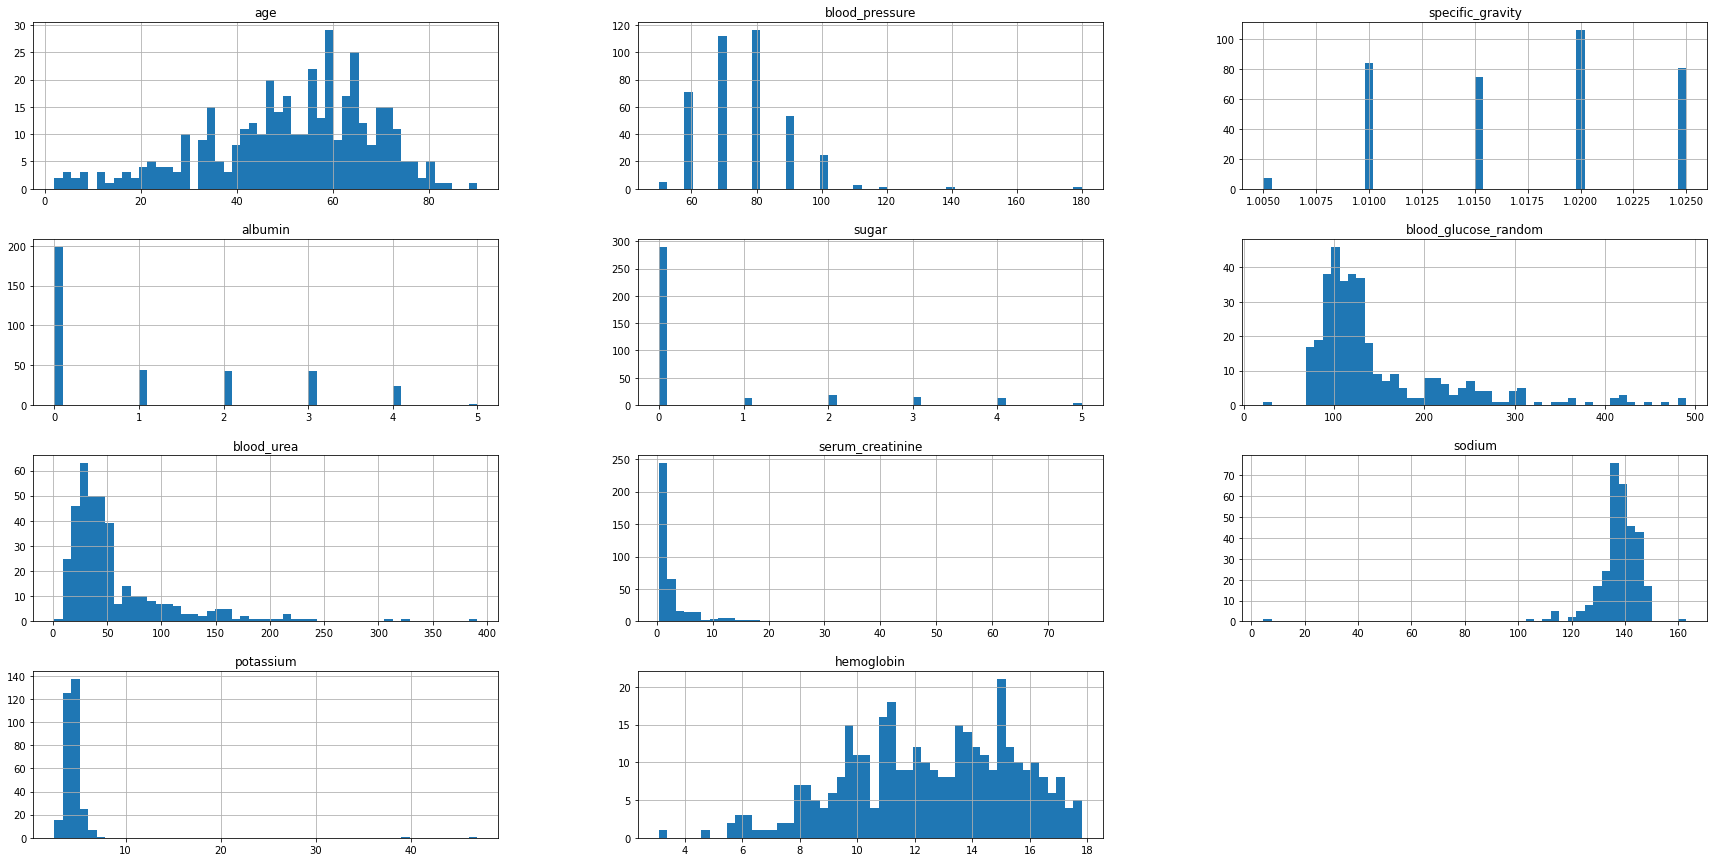

In [22]:
ckd_numdf = ckd_df[['age','blood_pressure','specific_gravity','albumin','sugar','blood_glucose_random','blood_urea',
                    'serum_creatinine','sodium','potassium','hemoglobin']]

viz = ckd_numdf
viz.hist(bins=50,figsize=(30,15))
plt.show()

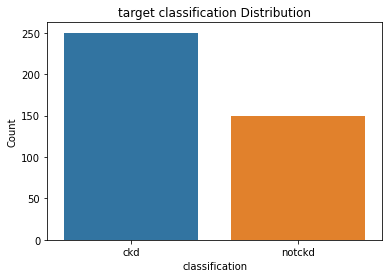

In [23]:
sns.countplot(x='classification',data=ckd_df)
plt.xlabel("classification")
plt.ylabel("Count")
plt.title("target classification Distribution")
plt.show()

In [24]:
##Percent of target data
print("Percent of distribution below:")
ckd_df["classification"].value_counts()/len(ckd_df)*100

Percent of distribution below:


ckd       62.5
notckd    37.5
Name: classification, dtype: float64

In [39]:
corr_df = ckd_df.corr()

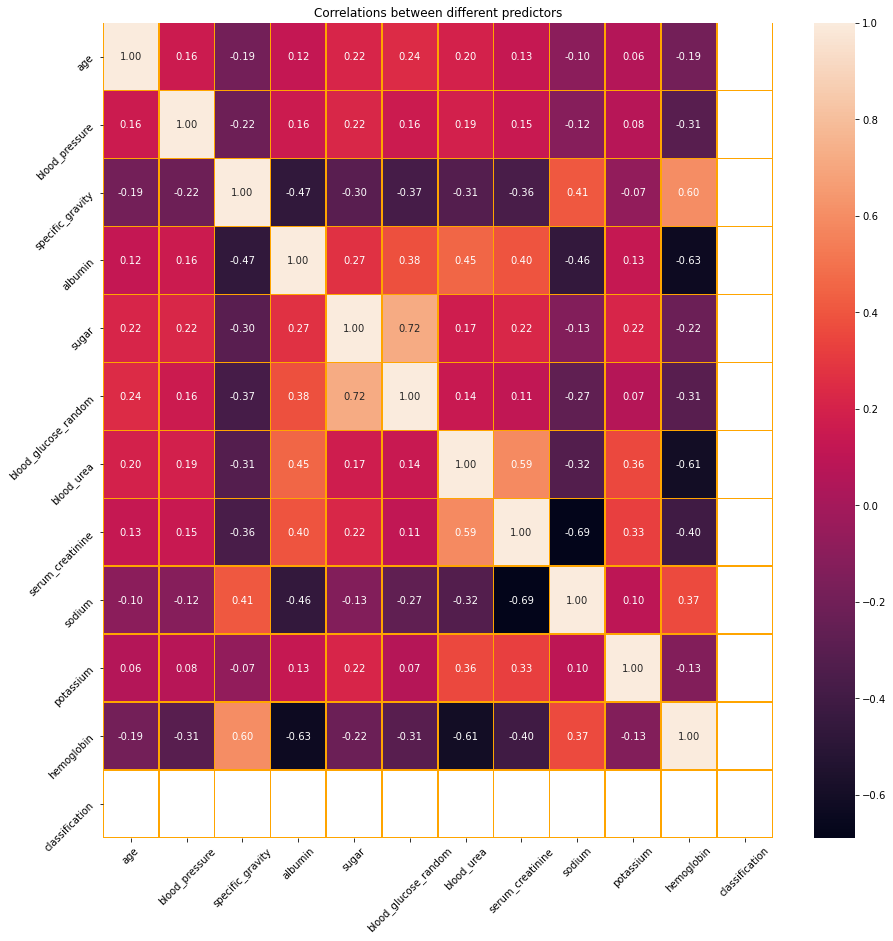

In [40]:
f,ax=plt.subplots(figsize=(15,15))
sns.heatmap(corr_df,annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Correlations between different predictors')
plt.show()

<AxesSubplot:>

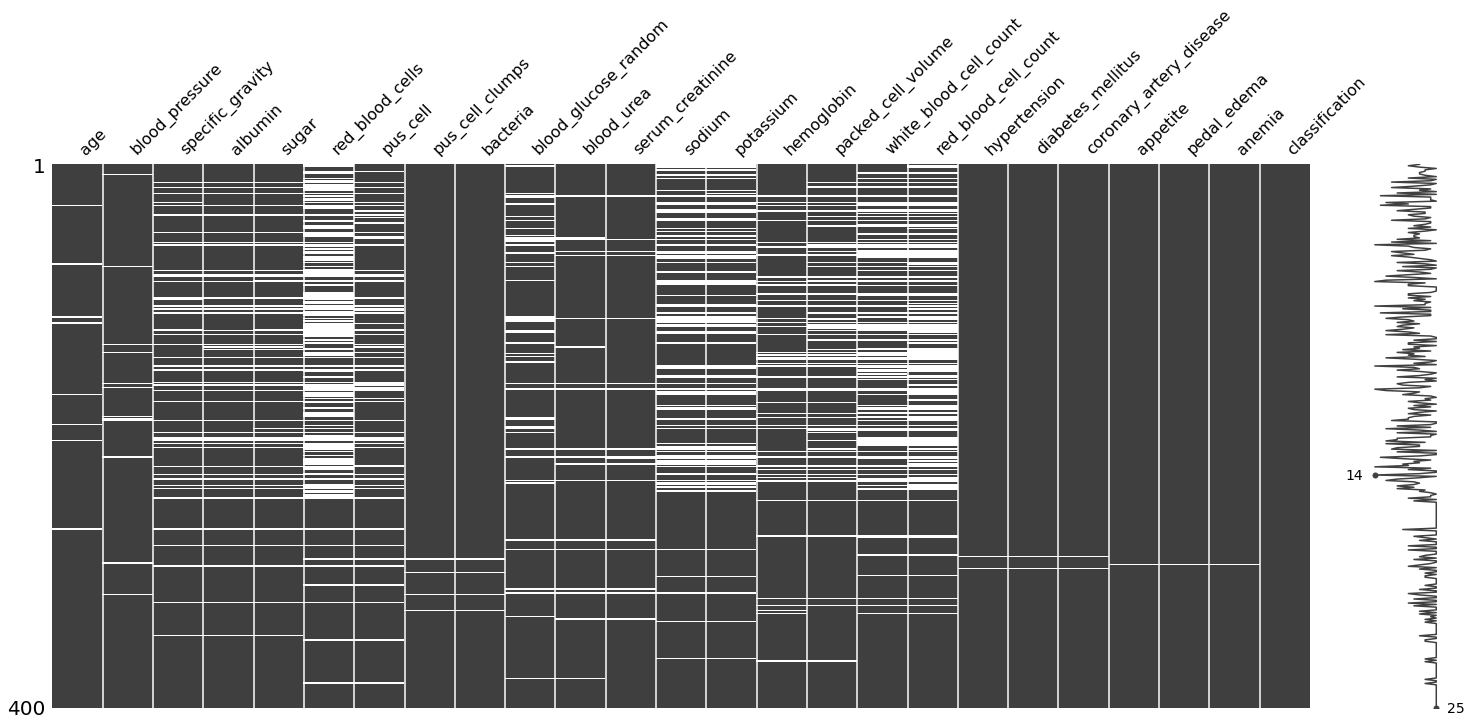

In [41]:
msno.matrix(ckd_df)

<AxesSubplot:>

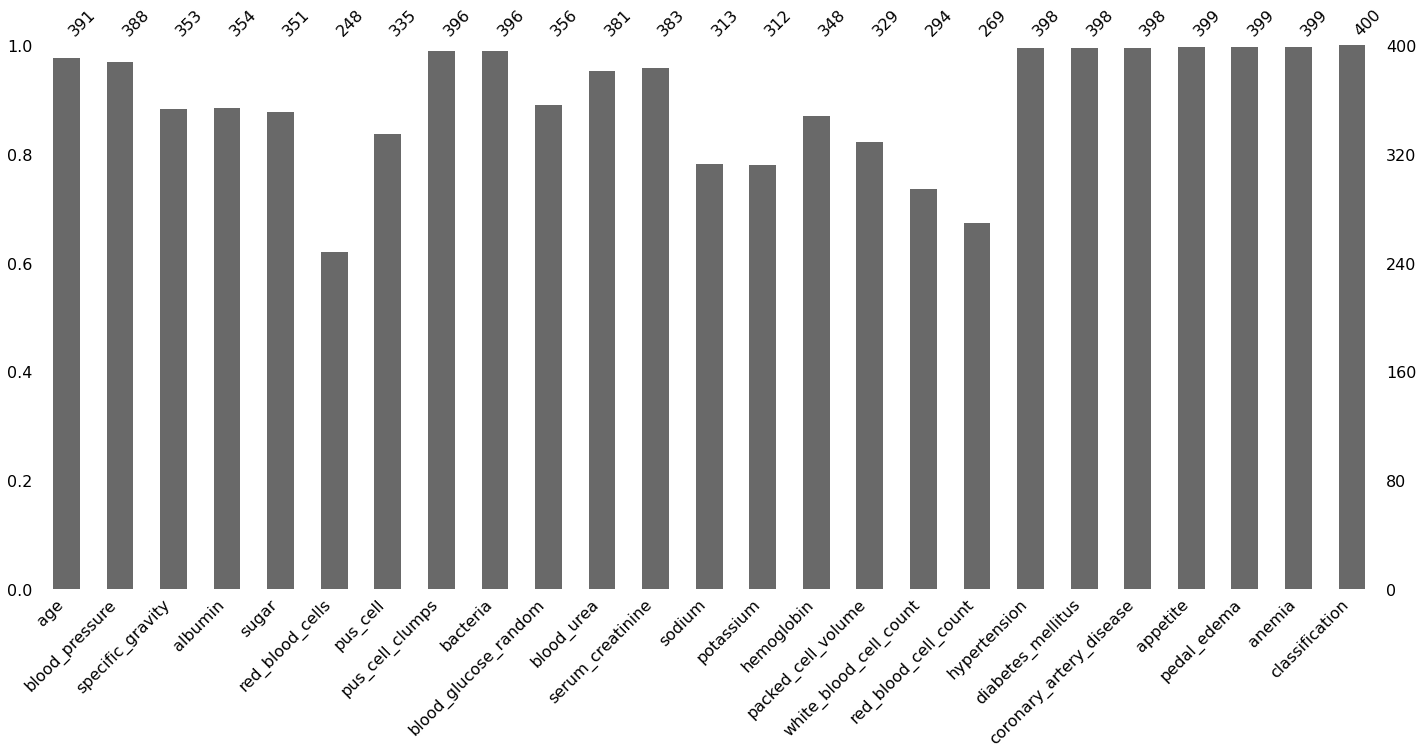

In [42]:
msno.bar(ckd_df)